# Import Required Libraries
Import the necessary libraries, including pandas, scikit-learn, and joblib.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
import joblib
import os

# Load the Dataset
Load the Heart Disease UCI Dataset using pandas.

In [17]:
# Load the dataset
data = pd.read_csv('Heart Disease UCI Dataset.csv')

# Display the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preprocess the Data
Handle missing values, encode categorical variables, and normalize the data if necessary.

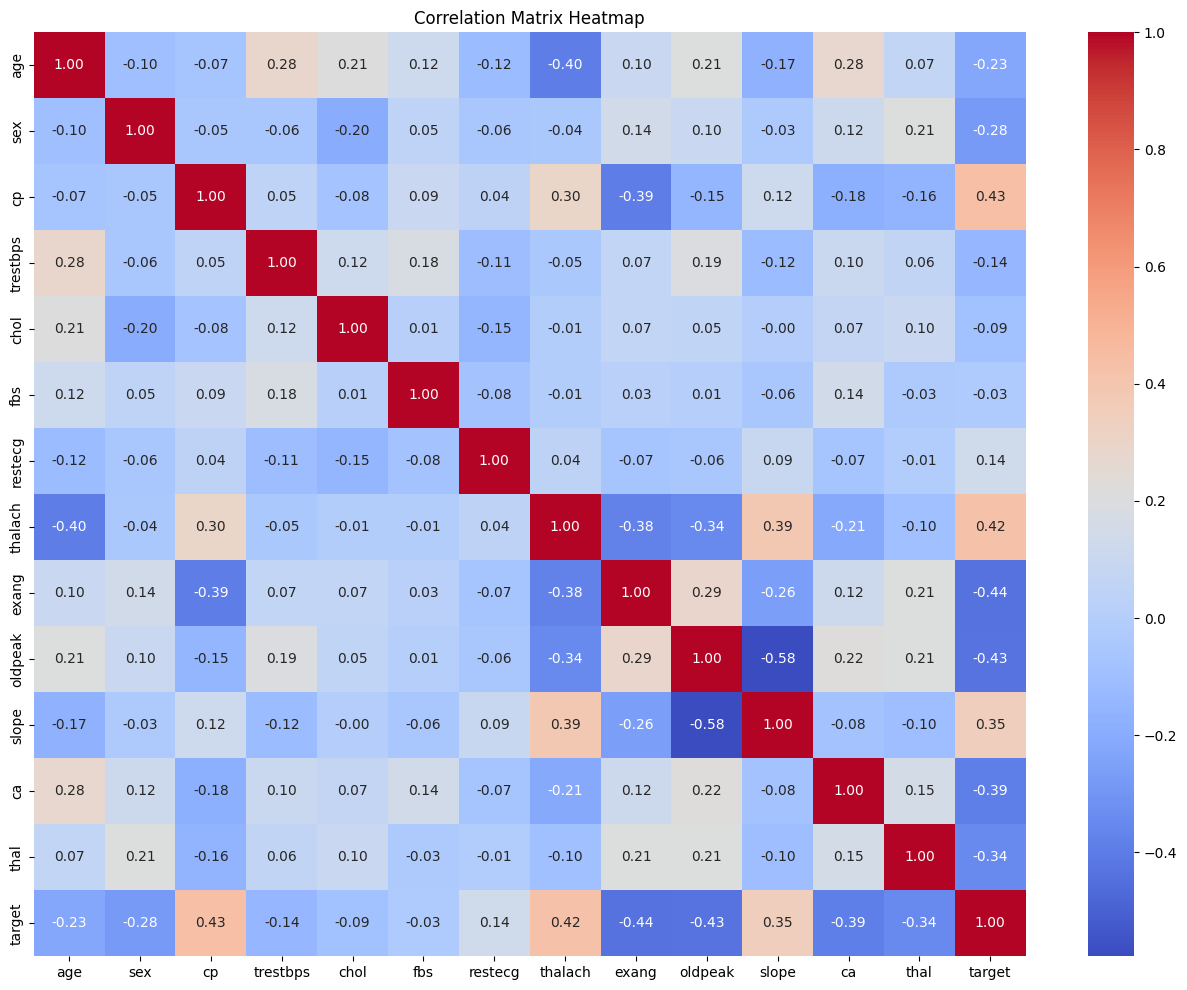

Correlation with target variable:
target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64
Relevant features:
['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age']


In [18]:
# Handle missing values by replacing '?' with NaN and then dropping rows with NaN values
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Encode categorical variables
data['sex'] = data['sex'].astype(int)
data['cp'] = data['cp'].astype(int)
data['fbs'] = data['fbs'].astype(int)
data['restecg'] = data['restecg'].astype(int)
data['exang'] = data['exang'].astype(int)
data['slope'] = data['slope'].astype(int)
data['ca'] = pd.to_numeric(data['ca'], errors='coerce').dropna().astype(int)
data['thal'] = pd.to_numeric(data['thal'], errors='coerce').dropna().astype(int)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Get the correlation of each feature with the target variable
target_column = 'target'
correlation_with_target = correlation_matrix[target_column].abs().sort_values(ascending=False)

# Display the correlation with the target variable
print("Correlation with target variable:")
print(correlation_with_target)

# Drop columns with low correlation to the target variable
threshold = 0.2
relevant_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# Keep only the relevant features
data_relevant = data[relevant_features]

# Split the data into features and target
X_relevant = data_relevant.drop(target_column, axis=1)
y_relevant = data_relevant[target_column]

# Display the relevant features
print("Relevant features:")
print(X_relevant.columns.tolist())

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_relevant)

# Split the Data into Training and Testing Sets
Use train_test_split from scikit-learn to split the data into training and testing sets.

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_relevant, test_size=0.2, random_state=42)

# Train the SVC Model
Initialize and train the SVC model using the training data.

In [20]:
# Define the base models
base_models = [
    ('svc', SVC(probability=True)),
    ('lr', LogisticRegression())
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('svc', SVC(probability=True)),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

# Evaluate the Model
Calculate the accuracy of the model using the testing data.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Stacking Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Stacking Model Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076924


# Save the Model
Save the trained model to a folder using joblib.

In [22]:
# Ensure the directory exists
os.makedirs('models', exist_ok=True)

# Save the model
joblib.dump(stacking_clf, 'models/Heart Disease UCI Prediction.pkl')

# Display the columns used for training the model
feature_columns = X_relevant.columns.tolist()
print("Columns used for training the model:")
print(feature_columns)

# Display the number of parameters needed for the prediction
print(f'Number of parameters needed for the prediction: {X_train.shape[1]}')

Columns used for training the model:
['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age']
Number of parameters needed for the prediction: 9
